# Import libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import data

In [28]:
dataset = pd.read_csv('avocado.csv')
dataset.shape

(18249, 14)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [30]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Drop the first colum "Unnamed"

In [31]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory analysis

Explore the region

In [32]:
x = np.array(dataset['region'])
print(np.unique(x))

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


Scatter plot

The correlation matrix:


Text(0.5, 1.0, 'Average price')

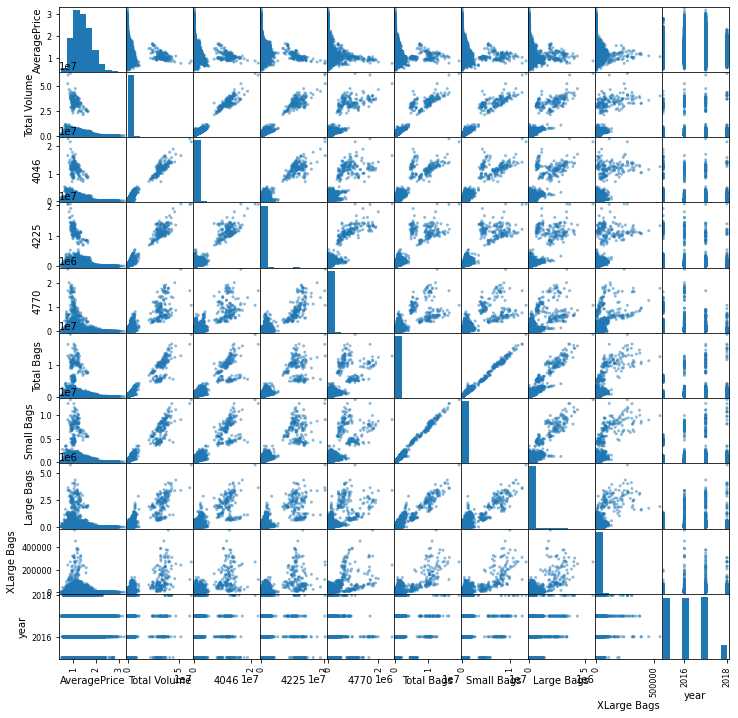

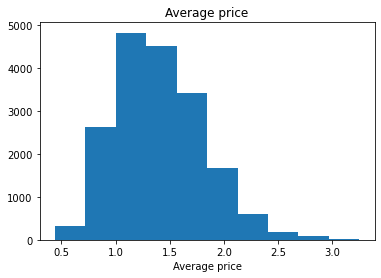

In [33]:
# Scatter plot of the data
from pandas.plotting import scatter_matrix

scatter_matrix(dataset,figsize = (12,12))
print('The correlation matrix:')
corr_mtx = dataset.corr()
corr_mtx.round(2)

plt.figure()
dataset_array = dataset.to_numpy()
price = dataset_array[:,1]
plt.hist(price)
plt.xlabel('Average price')
plt.title('Average price')

/Users/ray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

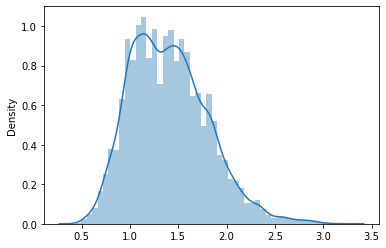

In [34]:
sns.distplot(price)

In [35]:
corr_mtx['AveragePrice'].abs().sort_values(ascending = False)

AveragePrice    1.000000
4046            0.208317
Total Volume    0.192752
4770            0.179446
Total Bags      0.177088
Small Bags      0.174730
Large Bags      0.172940
4225            0.172928
XLarge Bags     0.117592
year            0.093197
Name: AveragePrice, dtype: float64

Averaged Price plot by Date

Text(0.5, 1.0, 'AveragePrice')

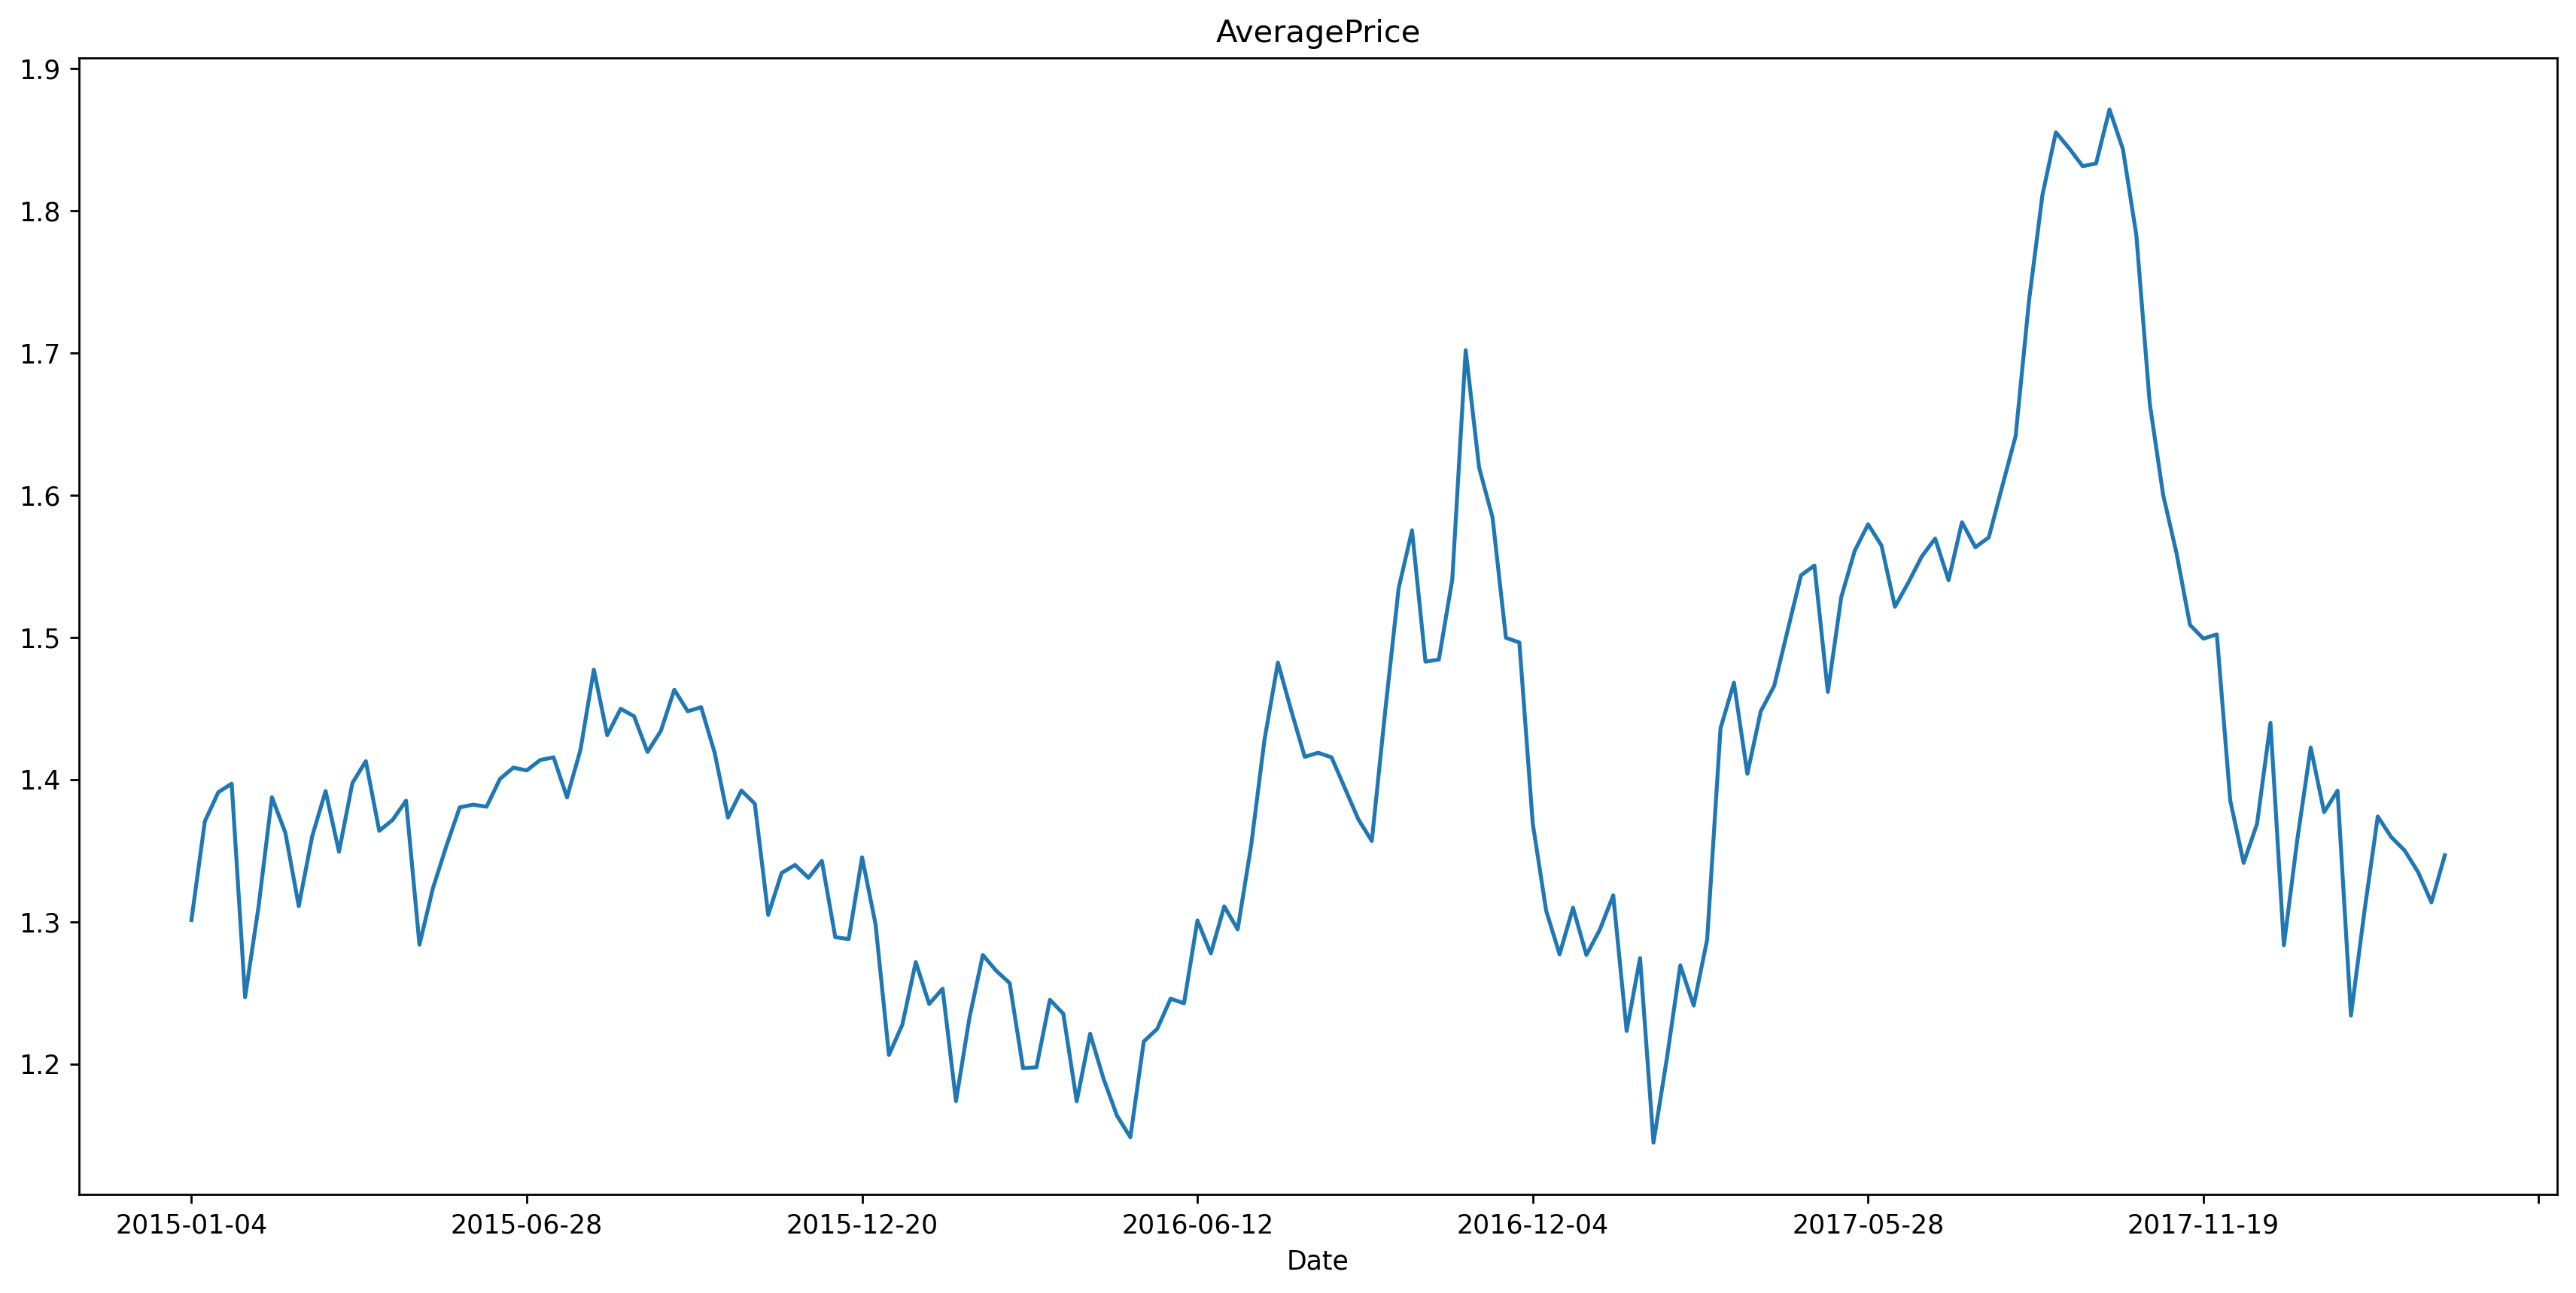

In [39]:
plt.figure(figsize=(17,8),dpi=250)
byDate = dataset.groupby('Date').mean()
byDate['AveragePrice'].plot()

plt.title('AveragePrice')
# I noticed your plot shows the month in 'Jan' and 'Jul'. I don't know how to do that so 
# I left it like this

Plot by year

<AxesSubplot:xlabel='year'>

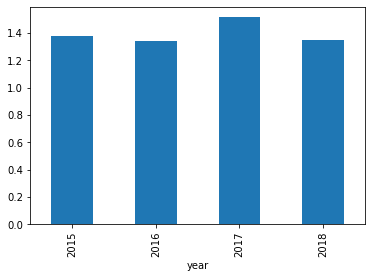

In [11]:
dataset.groupby([dataset.year])['AveragePrice'].mean().plot.bar()

Plot by region

Text(0.5, 1.0, 'Average Price According to Region')

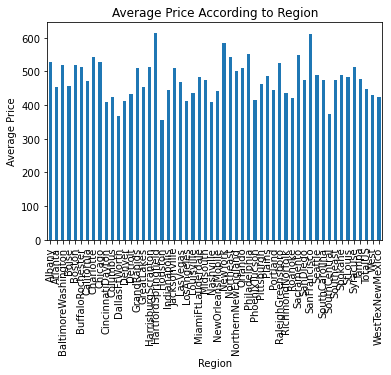

In [12]:
dataset.groupby([dataset.region])['AveragePrice'].sum().plot.bar()
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Plot by region in descending senquence

Text(0.5, 1.0, 'Average Price According to Region')

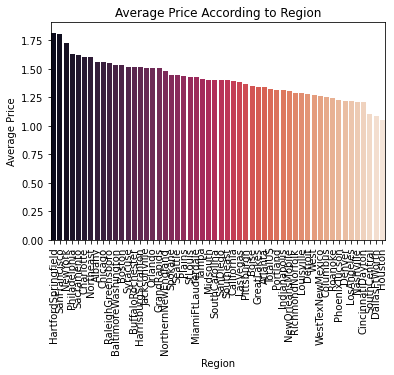

In [13]:
byRegion=dataset.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
# plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Plot of average price distribution

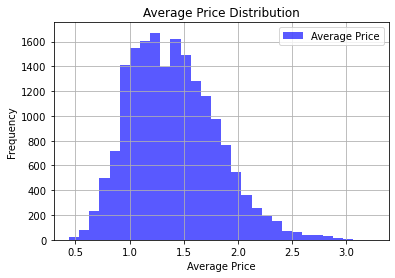

In [14]:
dataset["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

In [25]:
print(dataset['AveragePrice'].mean())
print(dataset['AveragePrice'].var())

1.4059784097758825
0.16214840834576077


Factor plot

/Users/ray/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/ray/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


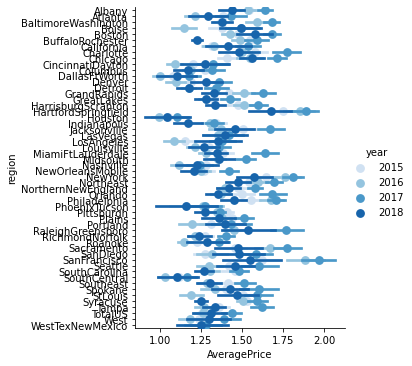

In [15]:
g = sns.factorplot('AveragePrice','region',data=dataset,
                   hue='year',
#                    size=18,
#                    aspect=0.7,
                   palette='Blues',
                   join=False,
              )

Heat map

<AxesSubplot:>

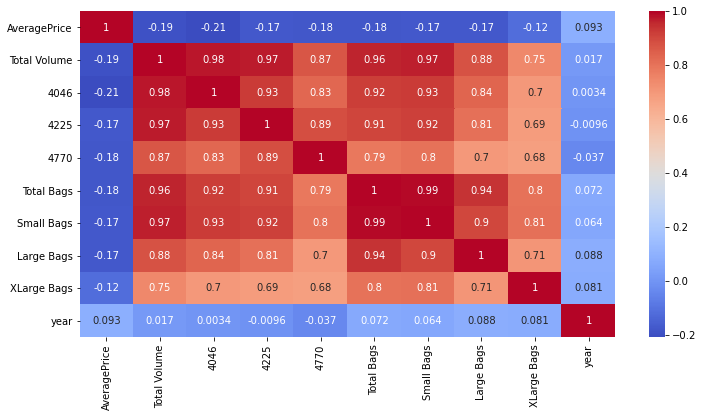

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)

# Preprocessing data

In [17]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Split the Date into Month and Day

In [18]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].apply(lambda x:x.month)
dataset['Day'] = dataset['Date'].apply(lambda x:x.day)

Plot of averaged price per month

Text(0.5, 1.0, 'Average Price Per Month')

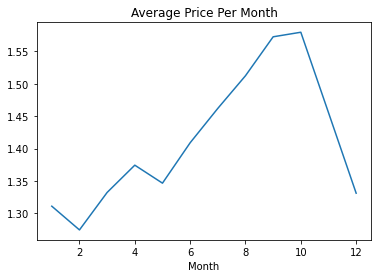

In [19]:
byMonth = dataset.groupby('Month').mean()

byMonth['AveragePrice'].plot()

plt.title('Average Price Per Month')


Plot of averaged price per day

Text(0.5, 1.0, 'Average Price Per Day')

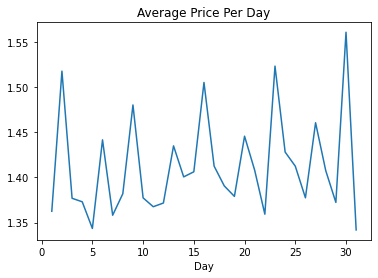

In [20]:
byDay = dataset.groupby('Day').mean()
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

## Drop the 'Date' column 

In [21]:
dataset.drop('Date', axis=1, inplace=True)
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Plot of average price over month

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

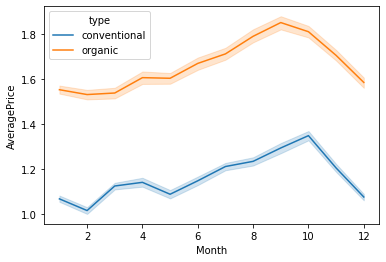

In [22]:
sns.lineplot(x='Month', y='AveragePrice', hue='type',data=dataset)
#plt.show()


Average price of different type

<AxesSubplot:xlabel='type'>

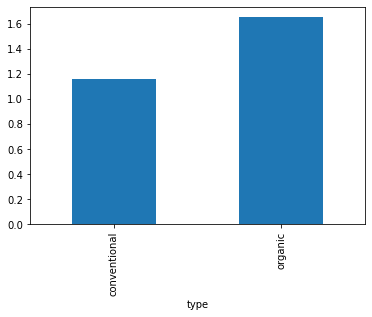

In [23]:
dataset.groupby([dataset['type']])['AveragePrice'].mean().plot.bar()

## Drop the 'region' column, convert the type into integer

In [24]:
dataset.drop('region', axis=1, inplace=True)
dataset['type'].nunique()
dataset_2bp = pd.get_dummies(dataset)